In [243]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score
# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import urduhack
from urduhack.preprocessing import normalize_whitespace
from urduhack.preprocessing import remove_punctuation
from urduhack.preprocessing import remove_accents
from urduhack.preprocessing import replace_currency_symbols
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [244]:
import pandas as pd
import os
  
# intialise data of lists.
data = {'text':[],
        'fake':[]}
  
# Create DataFrame
df = pd.DataFrame(data)
  
# Print the output.
df

,text,fake


In [245]:
import os
  
path = r"D:\Study\PHD\2nd Semster\independent Study 2\Fake news detection\1.Corpus\Train\Fake"

os.chdir(path)
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        f = open(file_path, "r",encoding="utf8")
        x=f.read()
        x= normalize_whitespace(x)
        x= remove_punctuation(x)
        x=remove_accents(x)
        x=replace_currency_symbols(x)
        new_row = {'text':x,'fake':'yes'}
        #append row to the dataframe
        df= df.append(new_row, ignore_index=True)

In [246]:
import os
  
path = r"D:\Study\PHD\2nd Semster\independent Study 2\Fake news detection\1.Corpus\Test\Fake"

os.chdir(path)
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        f = open(file_path, "r",encoding="utf8")
        x=f.read()
        x= normalize_whitespace(x)
        x= remove_punctuation(x)
        x=remove_accents(x)
        x=replace_currency_symbols(x)
        new_row = {'text':x,'fake':'yes'}
        #append row to the dataframe
        df= df.append(new_row, ignore_index=True)

In [247]:
import os
  
path = r"D:\Study\PHD\2nd Semster\independent Study 2\Fake news detection\1.Corpus\Train\Real"

os.chdir(path)
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        f = open(file_path, "r",encoding="utf8")
        x=f.read()
        x= normalize_whitespace(x)
        x= remove_punctuation(x)
        x=remove_accents(x)
        x=replace_currency_symbols(x)
        new_row = {'text':x,'fake':'no'}
        #append row to the dataframe
        df= df.append(new_row, ignore_index=True)

In [248]:
import os
  
path = r"D:\Study\PHD\2nd Semster\independent Study 2\Fake news detection\1.Corpus\Test\Real"

os.chdir(path)
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        f = open(file_path, "r",encoding="utf8")
        x=f.read()
        x= normalize_whitespace(x)
        x= remove_punctuation(x)
        x=remove_accents(x)
        x=replace_currency_symbols(x)
        new_row = {'text':x,'fake':'no'}
        #append row to the dataframe
        df= df.append(new_row, ignore_index=True)

In [249]:
print(df.shape)

(900, 2)


In [250]:
df = df.replace('\n','', regex=True)
print(df.shape)
df.to_csv (r'D:\Study\PHD\2nd Semster\independent Study 2\Fake news detection\data.csv', index = False, header=True)

(900, 2)


In [251]:
df.head()

,text,fake
0,عمران خان نے وزارت عظمی کا عہدہ سنبھالنے کے بع...,yes
1,پاکستان اسٹاک ایکسچینج پی ایس ایکس میں کاروبار...,yes
2,حکومت نے نئی سال کی آمد پر موبائل صارفین کے لی...,yes
3,ترکی میں روس کے ٹماٹروں کی بڑھتی ہو مانگ کے بع...,yes
4,ریاض اردو پوائنٹ اخبارتازہ ترین 18 نومبر2018ء ...,yes


In [252]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)


In [253]:
len(STOP_WORDS)

430

In [254]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [255]:
df['text'] =  df['text'].apply(remove_stopwords)

In [256]:
df['text'] = df['text'].apply(lemitizeStr)

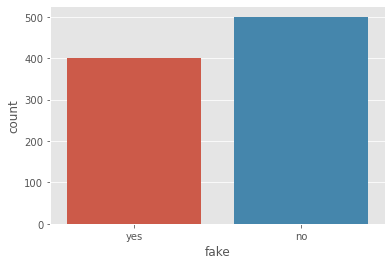

In [257]:
sns.countplot( x = 'fake', data = df );

In [258]:
le = LabelEncoder()
le.fit(df['fake'])
df['encoded_fake'] = le.transform(df['fake'])

In [259]:
df.head()
df_w2v = df.copy()

In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['encoded_fake'], test_size = 0.30, random_state = 7)

In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['encoded_fake'], test_size = 0.30, random_state = 7)
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (630,)
Shape of X_test (270,)
Shape of Y_train (630,)
Shape of Y_test (270,)


In [178]:
#max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [224]:
max_feature_num = 50000
vectorizer1 = TfidfVectorizer(max_features=max_feature_num,ngram_range = (1,2))
train_vecs1 = vectorizer1.fit_transform(X_train)
test_vecs1 = TfidfVectorizer(max_features=max_feature_num, ngram_range = (1,2), vocabulary=vectorizer1.vocabulary_).fit_transform(X_test)

In [93]:
SVM = svm.LinearSVC(max_iter=100)
SVM.fit(train_vecs1, Y_train)

test_predictionSVM= SVM.predict(test_vecs1)
accuracy = metrics.accuracy_score(test_predictionSVM, Y_test) * 100
print("Accuracy: {0:.2f}%".format(accuracy))
print(classification_report(test_predictionSVM, Y_test))
print(confusion_matrix(test_predictionSVM, Y_test))

Accuracy: 48.52%
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       153
           1       0.40      0.37      0.38       117

    accuracy                           0.49       270
   macro avg       0.47      0.47      0.47       270
weighted avg       0.48      0.49      0.48       270

[[88 65]
 [74 43]]


In [94]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(train_vecs1, Y_train)
test_predictionMNB = clf.predict(test_vecs1)
accuracy = metrics.accuracy_score(test_predictionMNB, Y_test) * 100
print("Accuracy: {0:.2f}%".format(accuracy))
print(classification_report(test_predictionMNB, Y_test), confusion_matrix(test_predictionMNB, Y_test))

Accuracy: 51.48%
              precision    recall  f1-score   support

           0       0.83      0.57      0.67       237
           1       0.05      0.15      0.07        33

    accuracy                           0.51       270
   macro avg       0.44      0.36      0.37       270
weighted avg       0.73      0.51      0.60       270
 [[134 103]
 [ 28   5]]


In [95]:
DT = DecisionTreeClassifier(max_depth = 9, random_state = 23 )
DT.fit(train_vecs1, Y_train)
test_predictionDT = DT.predict(test_vecs1)
accuracy = metrics.accuracy_score(test_predictionDT, Y_test) * 100
print("Accuracy: {0:.2f}%".format(accuracy))
print('Results of Decision Tree Classifier on TF-IDF Vectorizer')
print(classification_report(test_predictionDT, Y_test))
print(confusion_matrix(test_predictionDT, Y_test))


Accuracy: 62.59%
Results of Decision Tree Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       193
           1       0.39      0.55      0.45        77

    accuracy                           0.63       270
   macro avg       0.59      0.60      0.58       270
weighted avg       0.67      0.63      0.64       270

[[127  66]
 [ 35  42]]


In [96]:
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(test_predictionSVM,Y_test)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(Y_test,test_predictionDT)
fpr_MNB, tpr_MNB, thresholds_MNB = roc_curve(Y_test,test_predictionMNB)
auc_SVM = auc(fpr_SVM, tpr_SVM)
auc_DT = auc(fpr_DT, tpr_DT)
auc_MNB = auc(fpr_MNB, tpr_MNB)

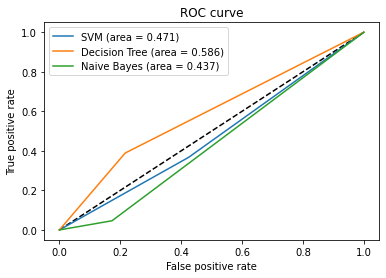

In [97]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVM, tpr_SVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fpr_MNB, tpr_MNB, label='Naive Bayes (area = {:.3f})'.format(auc_MNB))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [98]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=5,random_state=1)
Adab.fit(train_vecs1, Y_train)
y_pred3 = Adab.predict(test_vecs1)
test_predictionAdab = Adab.predict(test_vecs1)
accuracy = metrics.accuracy_score(test_predictionAdab, Y_test) * 100
print("Accuracy: {0:.2f}%".format(accuracy))
print(classification_report(test_predictionAdab, Y_test), confusion_matrix(test_predictionAdab, Y_test))

Accuracy: 68.15%
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       174
           1       0.55      0.61      0.58        96

    accuracy                           0.68       270
   macro avg       0.66      0.67      0.66       270
weighted avg       0.69      0.68      0.69       270
 [[125  49]
 [ 37  59]]


In [99]:
RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
RF.fit(train_vecs1, Y_train)
test_predictionRF = RF.predict(test_vecs1)
accuracy = metrics.accuracy_score(test_predictionRF, Y_test) * 100
print("Accuracy: {0:.2f}%".format(accuracy))
print('Results of Random Forest Classifier on TF-IDF Vectorizer')
print(classification_report(test_predictionRF, Y_test))
print(confusion_matrix(test_predictionRF, Y_test))

Accuracy: 63.70%
Results of Random Forest Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       188
           1       0.43      0.56      0.48        82

    accuracy                           0.64       270
   macro avg       0.60      0.62      0.60       270
weighted avg       0.67      0.64      0.65       270

[[126  62]
 [ 36  46]]


In [100]:
XGB = xgb.XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.01, n_estimators = 100)
XGB.fit(train_vecs1, Y_train)
test_predictionXGB = XGB.predict(test_vecs1)
accuracy = metrics.accuracy_score(test_predictionXGB, Y_test) * 100
print("Accuracy: {0:.2f}%".format(accuracy))
print('Results of XGB Classifier on TF-IDF Vectorizer')
print(classification_report(test_predictionXGB, Y_test))
print(confusion_matrix(test_predictionXGB, Y_test))

[12:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 64.44%
Results of XGB Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       158
           1       0.57      0.55      0.56       112

    accuracy                           0.64       270
   macro avg       0.63      0.63      0.63       270
weighted avg       0.64      0.64      0.64       270

[[112  46]
 [ 50  62]]


In [101]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(test_predictionRF,Y_test)
fpr_AB, tpr_AB, thresholds_AB = roc_curve(Y_test,test_predictionAdab)
auc_RF = auc(fpr_RF, tpr_RF)
auc_AB = auc(fpr_AB, tpr_AB)

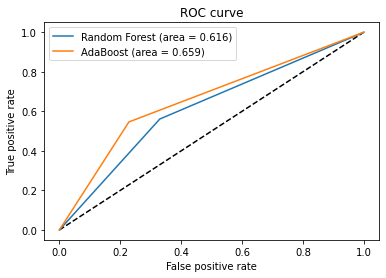

In [102]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fpr_AB, tpr_AB, label='AdaBoost (area = {:.3f})'.format(auc_AB))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

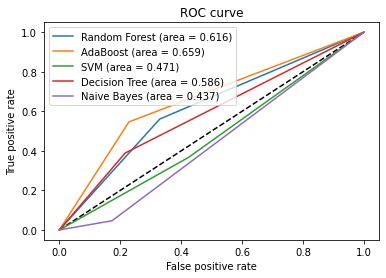

In [103]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fpr_AB, tpr_AB, label='AdaBoost (area = {:.3f})'.format(auc_AB))
plt.plot(fpr_SVM, tpr_SVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fpr_MNB, tpr_MNB, label='Naive Bayes (area = {:.3f})'.format(auc_MNB))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [260]:
df_w2v.head()

,text,fake,encoded_fake
0,عمران خان وزارت عظمی عہدہ سنبھالنے سعودی عرب ق...,yes,1
1,پاکستان اسٹاک ایکسچینج پی ایس ایکس کاروباری ہف...,yes,1
2,حکومت نئی سال آمد موبائل صارفین فونز درآمد پرس...,yes,1
3,ترکی روس ٹماٹروں بڑھتی مانگ 5 ترکی کمپنیوں روس...,yes,1
4,ریاض اردو پوائنٹ اخبارتازہ ترین 18 نومبر2018ء ...,yes,1


In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
#import gensim
import string
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score 
import numpy as np
from time import time
import os

In [262]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus=create_corpus(df)

100%|██████████| 900/900 [00:00<00:00, 1094.87it/s]


In [263]:
embedding_dict={}
with open(r'D:\Study\PHD\2nd Semster\independent Study 2\glove.6B.50d.txt','r', encoding="utf-8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [264]:
MAX_LEN=10
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [265]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 18384


In [266]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,50))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 18384/18384 [00:00<00:00, 317177.56it/s]


In [267]:
X_train,X_val, y_train, y_val = train_test_split(tweet_pad,df['encoded_fake'], test_size=.3, random_state=2)

In [268]:
print('Shape of train sequences: ',X_train.shape)
print('Shape of train labels: ',y_train.shape)
print("Shape of Validation sequences: ",X_val.shape)
print("Shape of Validation  labels: ",y_val.shape)

Shape of train sequences:  (630, 10)
Shape of train labels:  (630,)
Shape of Validation sequences:  (270, 10)
Shape of Validation  labels:  (270,)


In [234]:
model=Sequential()

embedding_layer=Embedding(num_words,50,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(tf.keras.layers.LSTM(32,return_sequences=True))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [115]:
optimzer=Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            937650    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 10, 50)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 64)            29440     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [116]:
history=model.fit(X_train,y_train,batch_size=16,epochs=10,validation_data=(X_val,y_val),verbose=1)

Epoch 1/10
40/40 [==============================] - 2s 54ms/step - loss: 0.6922 - acc: 0.5524 - val_loss: 0.6910 - val_acc: 0.5481
Epoch 2/10
40/40 [==============================] - 1s 19ms/step - loss: 0.6900 - acc: 0.5603 - val_loss: 0.6888 - val_acc: 0.5481
Epoch 3/10
40/40 [==============================] - 1s 18ms/step - loss: 0.6870 - acc: 0.5587 - val_loss: 0.6861 - val_acc: 0.5519
Epoch 4/10
40/40 [==============================] - 1s 20ms/step - loss: 0.6843 - acc: 0.5603 - val_loss: 0.6827 - val_acc: 0.5519
Epoch 5/10
40/40 [==============================] - 1s 20ms/step - loss: 0.6807 - acc: 0.5619 - val_loss: 0.6793 - val_acc: 0.5481
Epoch 6/10
40/40 [==============================] - 1s 20ms/step - loss: 0.6768 - acc: 0.5587 - val_loss: 0.6755 - val_acc: 0.5481
Epoch 7/10
40/40 [==============================] - 1s 19ms/step - loss: 0.6736 - acc: 0.5635 - val_loss: 0.6727 - val_acc: 0.5481
Epoch 8/10
40/40 [==============================] - 1s 20ms/step - loss: 0.6723 - a

In [269]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
emb_dim = embedding_matrix.shape[1]
gru_model = Sequential()
embedding_layer=Embedding(num_words,50,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)
gru_model.add(embedding_layer)
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
print(gru_model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 10, 50)            919250    
_________________________________________________________________
gru_5 (GRU)                  (None, 128)               69120     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 988,499
Trainable params: 69,249
Non-trainable params: 919,250
_________________________________________________________________
None


In [270]:
batch_size = 16
epochs  = 100
history = gru_model.fit(X_train,y_train, validation_data=(X_val,y_val), batch_size = batch_size, epochs = epochs)

Epoch 1/100
40/40 [==============================] - 1s 27ms/step - loss: 0.6803 - acc: 0.5444 - f1_m: 0.2081 - precision_m: 0.1725 - recall_m: 0.3001 - val_loss: 0.6722 - val_acc: 0.5519 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6646 - acc: 0.5429 - f1_m: 0.2245 - precision_m: 0.2266 - recall_m: 0.2675 - val_loss: 0.6632 - val_acc: 0.5593 - val_f1_m: 0.0299 - val_precision_m: 0.1176 - val_recall_m: 0.0172
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6570 - acc: 0.5619 - f1_m: 0.0242 - precision_m: 0.1000 - recall_m: 0.0138 - val_loss: 0.6656 - val_acc: 0.5593 - val_f1_m: 0.0299 - val_precision_m: 0.1176 - val_recall_m: 0.0172
Epoch 4/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6581 - acc: 0.5603 - f1_m: 0.0318 - precision_m: 0.1250 - recall_m: 0.0185 - val_loss: 0.6670 - val_acc: 0.5556 - val_f1_m: 0.0550 - val_precisi

Epoch 33/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6497 - acc: 0.5619 - f1_m: 0.0571 - precision_m: 0.2250 - recall_m: 0.0331 - val_loss: 0.7268 - val_acc: 0.5444 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 34/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6465 - acc: 0.5714 - f1_m: 0.1148 - precision_m: 0.3750 - recall_m: 0.0695 - val_loss: 0.7284 - val_acc: 0.5444 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 35/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6471 - acc: 0.5587 - f1_m: 0.0576 - precision_m: 0.1542 - recall_m: 0.0370 - val_loss: 0.7174 - val_acc: 0.5481 - val_f1_m: 0.0431 - val_precision_m: 0.1176 - val_recall_m: 0.0286
Epoch 36/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6494 - acc: 0.5683 - f1_m: 0.2644 - precision_m: 0.4608 - recall_m: 0.2040 - val_loss: 0.7119 - val_acc: 0.5444 - val_f1_m: 0.0327 - val_precision_m: 0.

Epoch 65/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6442 - acc: 0.5540 - f1_m: 0.1230 - precision_m: 0.3667 - recall_m: 0.0768 - val_loss: 0.7482 - val_acc: 0.5370 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 66/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6449 - acc: 0.5730 - f1_m: 0.0854 - precision_m: 0.2917 - recall_m: 0.0511 - val_loss: 0.7556 - val_acc: 0.5370 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 67/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6464 - acc: 0.5635 - f1_m: 0.0632 - precision_m: 0.2250 - recall_m: 0.0374 - val_loss: 0.7612 - val_acc: 0.5333 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 68/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6440 - acc: 0.5540 - f1_m: 0.1033 - precision_m: 0.3333 - recall_m: 0.0672 - val_loss: 0.7467 - val_acc: 0.5370 - val_f

Epoch 96/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6430 - acc: 0.5524 - f1_m: 0.1288 - precision_m: 0.3279 - recall_m: 0.0849 - val_loss: 0.7670 - val_acc: 0.5333 - val_f1_m: 0.0235 - val_precision_m: 0.0882 - val_recall_m: 0.0139
Epoch 97/100
40/40 [==============================] - 0s 11ms/step - loss: 0.6457 - acc: 0.5619 - f1_m: 0.0762 - precision_m: 0.2083 - recall_m: 0.0507 - val_loss: 0.7789 - val_acc: 0.5333 - val_f1_m: 0.0235 - val_precision_m: 0.0882 - val_recall_m: 0.0139
Epoch 98/100
40/40 [==============================] - 0s 9ms/step - loss: 0.6431 - acc: 0.5667 - f1_m: 0.0995 - precision_m: 0.3250 - recall_m: 0.0606 - val_loss: 0.7843 - val_acc: 0.5333 - val_f1_m: 0.0235 - val_precision_m: 0.0882 - val_recall_m: 0.0139
Epoch 99/100
40/40 [==============================] - 0s 10ms/step - loss: 0.6445 - acc: 0.5603 - f1_m: 0.1052 - precision_m: 0.3208 - recall_m: 0.0673 - val_loss: 0.7544 - val_acc: 0.5333 - val_f1_m: 0.0235 - val_precision_m: 0.08

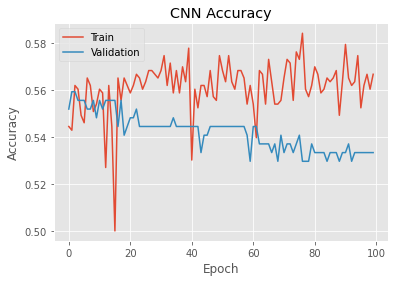

In [272]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [273]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

lstm_model = Sequential()
embedding_layer=Embedding(num_words,50,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(SpatialDropout1D(0.5))
lstm_model.add(LSTM(128, dropout=0.5,return_sequences=False))
lstm_model.add(Dense(1, activation = 'sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
print(lstm_model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 10, 50)            919250    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 10, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 1,011,027
Trainable params: 91,777
Non-trainable params: 919,250
_________________________________________________________________
None


In [274]:
batch_size = 16
epochs  = 100
history = lstm_model.fit(X_train,y_train, validation_data=(X_val,y_val), batch_size = batch_size, epochs = epochs)

Epoch 1/100
40/40 [==============================] - 1s 28ms/step - loss: 0.6827 - acc: 0.5476 - f1_m: 0.0231 - precision_m: 0.0367 - recall_m: 0.0292 - val_loss: 0.6679 - val_acc: 0.5519 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6764 - acc: 0.5571 - f1_m: 0.0167 - precision_m: 0.0500 - recall_m: 0.0100 - val_loss: 0.6615 - val_acc: 0.5519 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6610 - acc: 0.5365 - f1_m: 0.1584 - precision_m: 0.1983 - recall_m: 0.2270 - val_loss: 0.6616 - val_acc: 0.5519 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6666 - acc: 0.5571 - f1_m: 0.0285 - precision_m: 0.1125 - recall_m: 0.0164 - val_loss: 0.6621 - val_acc: 0.5481 - val_f1

Epoch 33/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6546 - acc: 0.5635 - f1_m: 0.0483 - precision_m: 0.2000 - recall_m: 0.0276 - val_loss: 0.6747 - val_acc: 0.5519 - val_f1_m: 0.0278 - val_precision_m: 0.0882 - val_recall_m: 0.0172
Epoch 34/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6555 - acc: 0.5635 - f1_m: 0.0513 - precision_m: 0.1875 - recall_m: 0.0301 - val_loss: 0.6744 - val_acc: 0.5481 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 35/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6569 - acc: 0.5619 - f1_m: 0.0496 - precision_m: 0.2000 - recall_m: 0.0285 - val_loss: 0.6755 - val_acc: 0.5481 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 36/100
40/40 [==============================] - 0s 11ms/step - loss: 0.6508 - acc: 0.5667 - f1_m: 0.0602 - precision_m: 0.2125 - recall_m: 0.0360 - val_loss: 0.6790 - val_acc: 0.5519 - val_f1_m: 0.0131 - val_precision_m: 0.

Epoch 65/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6522 - acc: 0.5667 - f1_m: 0.0586 - precision_m: 0.2042 - recall_m: 0.0351 - val_loss: 0.6888 - val_acc: 0.5444 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 66/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6502 - acc: 0.5667 - f1_m: 0.0644 - precision_m: 0.2500 - recall_m: 0.0374 - val_loss: 0.6878 - val_acc: 0.5444 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 67/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6518 - acc: 0.5619 - f1_m: 0.0489 - precision_m: 0.1417 - recall_m: 0.0320 - val_loss: 0.6894 - val_acc: 0.5444 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 68/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6482 - acc: 0.5635 - f1_m: 0.0524 - precision_m: 0.2000 - recall_m: 0.0309 - val_loss: 0.6917 - val_acc: 0.5444 - val_f1_m: 0.0131 - val_precision_m: 0.

Epoch 97/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6485 - acc: 0.5667 - f1_m: 0.0562 - precision_m: 0.2375 - recall_m: 0.0322 - val_loss: 0.6961 - val_acc: 0.5407 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 98/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6485 - acc: 0.5651 - f1_m: 0.0756 - precision_m: 0.2250 - recall_m: 0.0469 - val_loss: 0.6958 - val_acc: 0.5370 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 99/100
40/40 [==============================] - 0s 12ms/step - loss: 0.6489 - acc: 0.5667 - f1_m: 0.0571 - precision_m: 0.2167 - recall_m: 0.0353 - val_loss: 0.6960 - val_acc: 0.5407 - val_f1_m: 0.0131 - val_precision_m: 0.0588 - val_recall_m: 0.0074
Epoch 100/100
40/40 [==============================] - 1s 13ms/step - loss: 0.6452 - acc: 0.5667 - f1_m: 0.0532 - precision_m: 0.2125 - recall_m: 0.0306 - val_loss: 0.7008 - val_acc: 0.5407 - val_f1_m: 0.0131 - val_pr

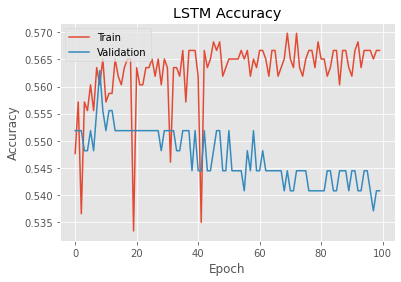

In [275]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('LSTM Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [276]:
y_pred_gru = gru_model.predict(X_val).ravel()
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_val, y_pred_gru)

y_pred_lstm = lstm_model.predict(X_val).ravel()
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_val, y_pred_lstm)
auc_gru = auc(fpr_gru, tpr_gru)
auc_lstm = auc(fpr_lstm, tpr_lstm)

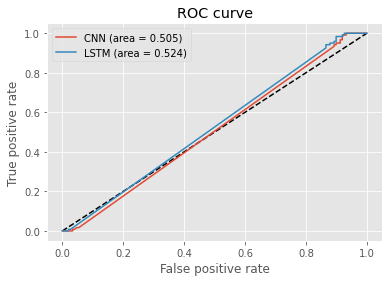

In [277]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gru, tpr_gru, label='CNN (area = {:.3f})'.format(auc_gru))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

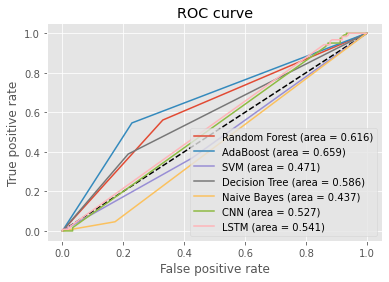

In [126]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fpr_AB, tpr_AB, label='AdaBoost (area = {:.3f})'.format(auc_AB))
plt.plot(fpr_SVM, tpr_SVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fpr_MNB, tpr_MNB, label='Naive Bayes (area = {:.3f})'.format(auc_MNB))
plt.plot(fpr_gru, tpr_gru, label='CNN (area = {:.3f})'.format(auc_gru))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()